# Neural Network from scratch on MNIST data set

MNIST data set is one of the popular data resources to learn deep learning. It contains handwritten digits from 0-9. It is ideal task for a computer to recognize numbers written by humans. For a human, it is very easy to tell what it is on the picture or video. But for a computer it's very hard and it requires a lot computing. Because for a computer image is just an array of pixels, numerical values that represent color shades Red, Green, and Blue.

In this post, I would like to show how we can build simple neural network with numpy. I am new to computer vision and deep learning and this is what I've learned so far. 

"While we teach, we learn"

Let's start. Upload neccessary library...

In [4]:
import numpy as np 
import pandas as pd
import scipy.special

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(1)

Uploading the data set. You can download it from here: http://pjreddie.com/projects/mnist-in-csv/

## Preparing the Data

In [5]:
# let's upload train data
train_data_file = open('/Users/abdygaziev/Documents/FlatironMaterials/Projects/data/mnist/mnist_train.csv','r')
train_data_list = train_data_file.readlines()
train_data_file.close()

# # let's upload test data
test_data_file = open('/Users/abdygaziev/Documents/FlatironMaterials/Projects/data/mnist/mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()


Let's chech how many records in our train & test data-sets.

In [6]:
print('Number of training examples: ',len(train_data_list))
print('Number of test examples: ',len(test_data_list))

Number of training examples:  60000
Number of test examples:  10000


We stored our data in train_data_list. It is a list that contains all the data. The first element of the record is a **label**. For example, first element of the first record in our train data-set is number 5, and the rest is pixel values of number 5. If you look closely, you'll find that all values are within 0 - 255 range. 

In [7]:
train_data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Let's plot arrays using matplotlib. First we need to convert data set from string to a float type.

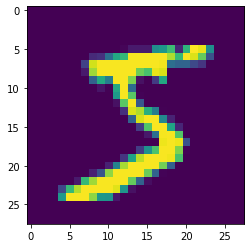

In [8]:
five = train_data_list[0].split(',')
img = np.asfarray(five[1:]).reshape((28,28))
plt.imshow(img);

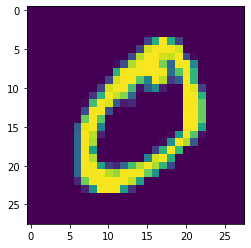

In [9]:
zero = train_data_list[1].split(',')
img = np.asfarray(zero[1:]).reshape((28,28))
plt.imshow(img);

Right now we can start buidling our neural network. We'll build class object called Network.

In [10]:
# defining a network class

class Network:
    
    #initialize neural nets
    def __init__(self,inodes,hnodes,onodes,lrate):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        
        self.wih = np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.lrate = lrate
        
        self.activation = lambda x: scipy.special.expit(x)
        
        pass        
        
       
    def train(self,input_list,target_list):
        
        inputs = np.array(input_list,ndmin=2).T
        
        targets = np.array(target_list,ndmin=2).T
    
    
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        #update weights between hidden & output layers
        self.who += self.lrate *np.dot((output_errors*final_outputs*(1.0-final_outputs)),
                                       np.transpose(hidden_outputs))
        
        
        #update weigths between input & hidden layers
        self.wih +=  self.lrate * np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),
                                         np.transpose(inputs))
        
    
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation(final_inputs)
        
        return final_outputs

## Train the nueral network with train data

In [14]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
net = Network(input_nodes,hidden_nodes,output_nodes, learning_rate)


In [15]:
# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in train_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        net.train(inputs, targets)
        pass
    pass

## Prediction and accuracy

In [20]:

score_card = []

for record in test_data_list:
    all_values = record.split(',')
    
    #correct labesl
    correct_label = [int(all_values[0])]
    
    #normalize inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #prediction
    outputs = net.query(inputs)
    
    #index of max value corresponds to the label
    label = np.argmax(outputs)
    
    #append to list if correct/incorrect:
    if (label==correct_label):
        score_card.append(1)
    else:
        score_card.append(0)
        pass
    pass

Let's calculate the accuracy of our model.

In [21]:
# calculate the performance

score_card_array = np.asarray(score_card)
print(score_card_array.sum() / score_card_array.size)

0.9742


97% accuracy is very good for this kind of simple model with just 5 epochs. Every time when we increase epochs neural network starts memorizing the data-set and it will eventually overfit.

Now, let's try with epcohs = 10.

In [22]:
# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in train_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        net.train(inputs, targets)
        pass
    pass


score_card = []

for record in test_data_list:
    all_values = record.split(',')
    
    #correct labesl
    correct_label = [int(all_values[0])]
    
    #normalize inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #prediction
    outputs = net.query(inputs)
    
    #index of max value corresponds to the label
    label = np.argmax(outputs)
    
    #append to list if correct/incorrect:
    if (label==correct_label):
        score_card.append(1)
    else:
        score_card.append(0)
        pass
    pass

# calculate the performance

score_card_array = np.asarray(score_card)
print(score_card_array.sum() / score_card_array.size)

0.9759


After 10 iterations, accuracy barely improved. 

There are many greate resources to learn about deep learning. Here the list of some of them:
* http://makeyourownneuralnetwork.blogspot.com - Maker your own neural network
* http://neuralnetworksanddeeplearning.com/ - Nerual networks and deep learning by Michael Nielsen
* https://iamtrask.github.io/ - blog posts from Andrew Trask